In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv("../Data/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

## AdaBoost

Adaptive boosting or AdaBoost is one of the simplest boosting algorithms. Usually, decision trees are used for modelling. Multiple sequential models are created, each correcting the errors from the last model. AdaBoost assigns weights to the observations which are incorrectly predicted and the subsequent model works to predict these values correctly.

Below are the steps for performing the AdaBoost algorithm:

    1.Initially, all observations in the dataset are given equal weights.
    2.A model is built on a subset of data.
    3.Using this model, predictions are made on the whole dataset.
    4.Errors are calculated by comparing the predictions and actual values.
    5.While creating the next model, higher weights are given to the data points which were predicted incorrectly.
    6.Weights can be determined using the error value. For instance, higher the error more is the weight assigned to the observation.
    7.This process is repeated until the error function does not change, or the maximum limit of the number of estimators is reached.


AdaBoost can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem.

The most suited and therefore most common algorithm used with AdaBoost are decision trees with one level. Because these trees are so short and only contain one decision for classification, they are often called decision stumps.

Each instance in the training dataset is weighted. The initial weight is set to:

#### weight(xi) = 1/n

Where xi is the i’th training instance and n is the number of training instances.


## Train One Model

A weak classifier (decision stump) is prepared on the training data using the weighted samples. 

The misclassification rate is calculated for the trained model. Traditionally, this is calculated as:

#### error = (correct – N) / N

Where error is the misclassification rate, correct are the number of training instance predicted correctly by the model and N is the total number of training instances. For example, if the model predicted 78 of 100 training instances correctly the error or misclassification rate would be (78-100)/100 or 0.22.

This is modified to use the weighting of the training instances:

#### error = sum(w(i) * terror(i)) / sum(w)

Which is the weighted sum of the misclassification rate, where w is the weight for training instance i and terror is the prediction error for training instance i which is 1 if misclassified and 0 if correctly classified.

For example, if we had 3 training instances with the weights 0.01, 0.5 and 0.2. The predicted values were 1, 1 and 1, and the actual output variables in the instances were 1, 0 and 1, then the terrors would be 0, 1, and 0. The misclassification rate would be calculated as:

#### error = (0.01*0 + 0.5*1 + 0.2*0) / (0.01 + 0.5 + 0.2)

or

#### error = 0.704

A stage value is calculated for the trained model which provides a weighting for any predictions that the model makes. The stage value for a trained model is calculated as follows:

#### stage = ln((1-error) / error)

Where stage is the stage value used to weight predictions from the model, ln() is the natural logarithm and error is the misclassification error for the model. The effect of the stage weight is that more accurate models have more weight or contribution to the final prediction.

The training weights are updated giving more weight to incorrectly predicted instances, and less weight to correctly predicted instances.

For example, the weight of one training instance (w) is updated using:

#### w = w * exp(stage * terror)

Where w is the weight for a specific training instance, exp() is the numerical constant e or Euler’s number raised to a power, stage is the misclassification rate for the weak classifier and terror is the error the weak classifier made predicting the output variable for the training instance, evaluated as:

#### terror = 0 if(y == p), otherwise 1

Where y is the output variable for the training instance and p is the prediction from the weak learner.

This has the effect of not changing the weight if the training instance was classified correctly and making the weight slightly larger if the weak learner misclassified the instance.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(xtrain, ytrain)
model.score(xtest,ytest)

0.7792207792207793

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(xtrain, ytrain)
model.score(xtest,ytest)

0.2337416300445292

Parameters

    base_estimators:
        It helps to specify the type of base estimator, that is, the machine learning algorithm to be used as base learner.
    n_estimators:
        It defines the number of base estimators.
        The default value is 10, but you should keep a higher value to get better performance.
    learning_rate:
        This parameter controls the contribution of the estimators in the final combination.
        There is a trade-off between learning_rate and n_estimators.
    max_depth:
        Defines the maximum depth of the individual estimator.
        Tune this parameter for best performance.
    n_jobs
        Specifies the number of processors it is allowed to use.
        Set value to -1 for maximum processors allowed.
    random_state :
        An integer value to specify the random data split.
        A definite value of random_state will always produce same results if given with same parameters and training data.


## Gradient Boosting (GBM)

Gradient Boosting or GBM is another ensemble machine learning algorithm that works for both regression and classification problems. GBM uses the boosting technique, combining a number of weak learners to form a strong learner. Regression trees used as a base learner, each subsequent tree in series is built on the errors calculated by the previous tree.


Accuracy is : 0.8116883116883117
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



<AxesSubplot:>

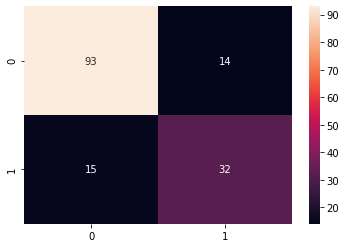

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(xtrain, ytrain)
ypred=model.predict(xtest)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)